In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import xgboost as xgb
import shap

In [44]:
df = pd.read_csv('C:\\Users\\LHF\\Desktop\\数据库\\论文\\数据\\RDKit_10.csv',encoding='unicode_escape')
X = df.iloc[:, 1:223]
Y = df.iloc[:, 223:]
Y=Y['PCE']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
feature_names = X_train.columns.tolist()
print("X_train's shape is", X_train.shape,"; y_train's shape is", y_train.shape)
X

X_train's shape is (79, 222) ; y_train's shape is (79,)


,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,I,Br,CL,C60,BCP,PC60BM,PCBM,PC61BM,PEAI,ALD-SnO2
0,2.219,734.341,13.458,10.230,11.125,9.061,6.067,7.865,4.574,6.351,...,1.00,0.00,0.0,1,1,0,0,0,0,0
1,2.219,734.341,13.458,10.230,11.125,9.061,6.067,7.865,4.574,6.351,...,1.00,0.00,0.0,1,1,0,0,0,0,0
2,2.219,734.341,13.458,10.230,11.125,9.061,6.067,7.865,4.574,6.351,...,1.00,0.00,0.0,1,1,0,0,0,0,0
3,2.219,734.341,13.458,10.230,11.125,9.061,6.067,7.865,4.574,6.351,...,1.00,0.00,0.0,1,1,0,0,0,0,0
4,2.273,674.271,12.535,9.836,9.836,8.771,5.949,5.949,4.330,4.330,...,1.00,0.00,0.0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.614,1842.863,29.380,23.673,23.673,20.448,13.322,13.322,9.784,9.784,...,0.84,0.16,0.0,1,1,0,0,0,0,0
95,1.411,2189.769,33.363,26.983,26.983,23.414,15.393,15.393,11.361,11.361,...,0.84,0.16,0.0,1,1,0,0,0,0,0
96,1.614,1842.863,29.380,23.673,23.673,20.448,13.322,13.322,9.784,9.784,...,0.84,0.16,0.0,1,1,0,0,0,0,0
97,1.411,2189.769,33.363,26.983,26.983,23.414,15.393,15.393,11.361,11.361,...,0.84,0.16,0.0,1,1,0,0,0,0,0


In [45]:
xgb_regressor = xgb.sklearn.XGBRegressor(n_estimators=400,  
                                         colsample_bytree=0.05,  
                                         gamma=0.57,        
                                         learning_rate=0.93,
                                         max_depth=7,       
                                         min_child_weight=5,
                                         reg_alpha=0.1,     
                                         reg_lambda=1,      
                                         subsample=0.9,     
                                        )                  
                                                            
model = xgb_regressor

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

In [47]:
xgb_regressor.fit(X_train_stand, y_train)
y_train_hat = xgb_regressor.predict(X_train_stand)
y_test_hat = xgb_regressor.predict(X_test_stand)

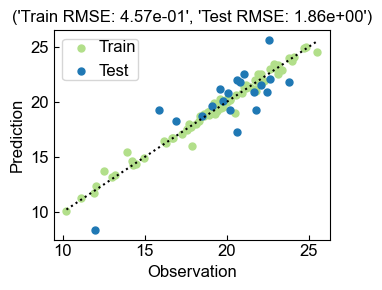

In [48]:
fontsize = 12
plt.figure(figsize=(3.5,3))
plt.style.use('default')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rcParams['font.family']="Arial"
a = plt.scatter(y_train, y_train_hat, s=25,c='#b2df8a')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k:', lw=1.5)
plt.xlabel('Observation', fontsize=fontsize)
plt.ylabel('Prediction', fontsize=fontsize)
plt.tick_params(direction='in')
plt.title(('Train RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))),\
              'Test RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)))), fontsize=fontsize)
b = plt.scatter(y_test, y_test_hat, s=25,c='#1f78b4')
plt.legend((a,b),('Train','Test'),fontsize=fontsize,handletextpad=0.1,borderpad=0.1)
plt.rcParams['font.family']="Arial"
plt.tight_layout()
plt.show()

In [49]:
np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))

0.45712628715034115

In [50]:
np.sqrt(metrics.mean_squared_error(y_test, y_test_hat))

1.8621584260366812

In [51]:
metrics.mean_absolute_error(y_test, y_test_hat)

1.5278805713653567

In [52]:
import sklearn.metrics as metrics
from scipy.stats.stats import pearsonr

# Defining Metrics
def R2Score(X,Y):
    r2=metrics.r2_score(X,Y)
    return r2
#计算R²分数（R-squared score），也被称为决定系数，它衡量了回归模型对目标变量的方差解释比例。
#参数 X 和 Y 是两个数组，分别表示模型的预测值和实际目标值。

def PearsonCoefficient(X, Y):
    corr, _ = pearsonr(X,Y)
    return corr
#计算Pearson相关系数，衡量了两个变量之间的线性关系强度和方向。

In [53]:
PearsonCoefficient(y_test,y_test_hat)

0.8161142467717873

In [54]:
PearsonCoefficient(y_train,y_train_hat)

0.9908815123056177

In [55]:
R2Score(y_test,y_test_hat)

0.5058336271803932

In [56]:
R2Score(y_train,y_train_hat)

0.9817204387662573

In [57]:
df1 = pd.read_csv('C:\\Users\\LHF\\Desktop\\数据库\\论文\\数据\\RDKit_yanzheng_10.csv', encoding='unicode_escape')
X1 = df1.iloc[:, 1:223]
Y1 = df1.iloc[:, 223:]
Y1 = Y1['PCE']
X1_stand = scaler.transform(X1)
prediction = xgb_regressor.predict(X1_stand)

error = ((prediction - Y1).abs())/Y1*100



prediction_df = pd.DataFrame({
    'Prediction': prediction.round(2), 
    'True': Y1.round(2),  # 使用保留两位小数的 Y1
    'Relative Error': error.round(2).map('{:.2f}%'.format)
})

prediction_df

,Prediction,True,Relative Error
0,17.110001,23.13,26.02%
1,23.290001,23.54,1.07%
2,22.469999,22.13,1.54%
3,24.450001,23.00,6.29%
4,25.469999,24.70,3.12%
5,25.639999,25.50,0.55%
6,25.639999,26.20,2.14%
7,21.910000,26.11,16.07%
8,22.660000,25.40,10.80%


In [58]:
df2 = pd.read_csv('C:\\Users\\LHF\\Desktop\\数据库\\论文\\数据\\new_SAM.csv', encoding='unicode_escape')
X2 = df2.iloc[:, 1:223]
X2_stand = scaler.transform(X2)
prediction = xgb_regressor.predict(X2_stand)




prediction_df = pd.DataFrame({
    'Prediction': prediction.round(2), 
})


prediction

array([26.93933 , 26.734478, 26.603022], dtype=float32)

In [59]:
####shap#####
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_stand)

print(shap_values.shape)

shap_explainer = explainer(X_train_stand)
feature_names = X_train.columns.tolist()

(79, 222)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


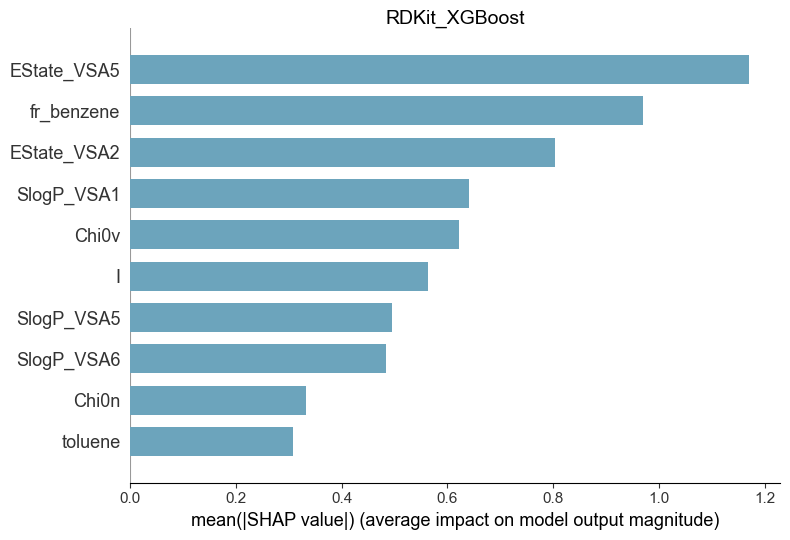

In [60]:
shap.summary_plot(shap_values, X_train_stand, feature_names=feature_names, plot_type="bar", max_display=10, color='#6CA4BC', show=False)


plt.title("RDKit_XGBoost", fontsize=14, pad=1)  # pad 控制标题与图的间距

# 3. 调整布局（防止标题或标签被裁剪）
plt.tight_layout()

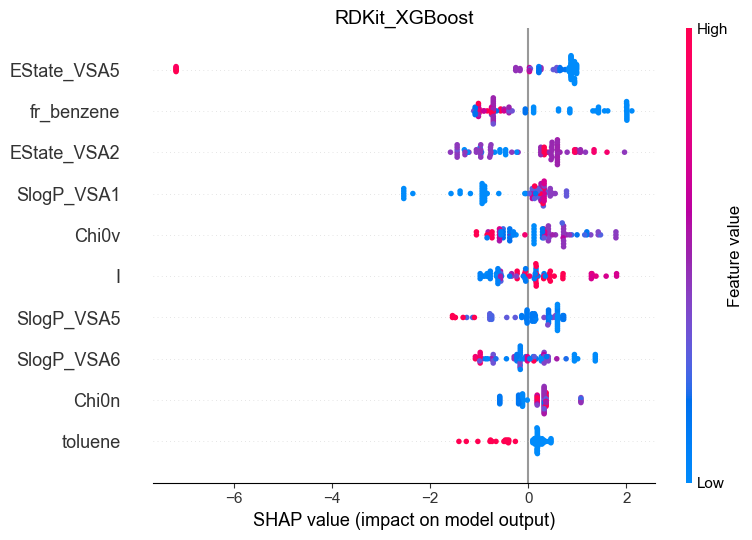

In [61]:
shap.summary_plot(shap_values, X_train_stand, feature_names=feature_names, max_display=10, show=False)

plt.title("RDKit_XGBoost", fontsize=14, pad=1)  # pad 控制标题与图的间距

# 3. 调整布局（防止标题或标签被裁剪）
plt.tight_layout()

<Figure size 1200x800 with 0 Axes>

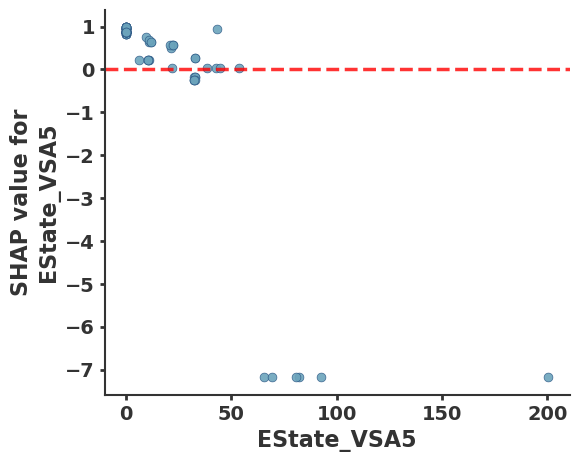

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# 使用支持数学符号的字体
plt.rcParams['font.family'] = 'DejaVu Sans'  # 或者 'Arial', 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# 创建更大的图形
plt.figure(figsize=(12, 8))

# 绘制SHAP依赖图
shap.dependence_plot('EState_VSA5', shap_values, X_train, feature_names=feature_names, 
                    interaction_index=None,  # 不显示交互特征的颜色渐变
                    show=False)

# 获取当前坐标轴
ax = plt.gca()

# 只修改散点图的颜色，保持线条颜色不变
if ax.collections:
    scatter = ax.collections[0]
    # 仅修改散点颜色，不修改线条
    scatter.set_color('#6CA4BC')  # 浅蓝色
    scatter.set_alpha(0.9)        # 高的不透明度
    scatter.set_sizes([40])       # 点的大小
    scatter.set_edgecolor('#2E5A87')  # 更深的蓝色作为边框
    scatter.set_linewidth(0.5)    # 边框宽度
    
# 添加y=0处的红色虚线（更醒目）
ax.axhline(y=0, color='red', linestyle='--', linewidth=2.5, alpha=0.9)

# 增强坐标轴标签和刻度
ax.set_xlabel(ax.get_xlabel(), fontsize=16, fontweight='bold')
ax.set_ylabel(ax.get_ylabel(), fontsize=16, fontweight='bold')

# 设置坐标轴刻度字体大小和粗细
ax.tick_params(axis='both', which='major', labelsize=14, width=2)
ax.tick_params(axis='both', which='minor', labelsize=12)

# 增强坐标轴线宽
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# 移除网格线（关键修改）
ax.grid(False)

# **注意：这里不修改线条的颜色，让它保持SHAP默认的红色**
# 只调整线条的粗细和透明度
lines = ax.get_lines()
if len(lines) > 0:
    for line in lines:
        # 保持线条原来的颜色（红色）
        line.set_linewidth(2.5)
        line.set_alpha(0.8)



plt.show()

<Figure size 1200x800 with 0 Axes>

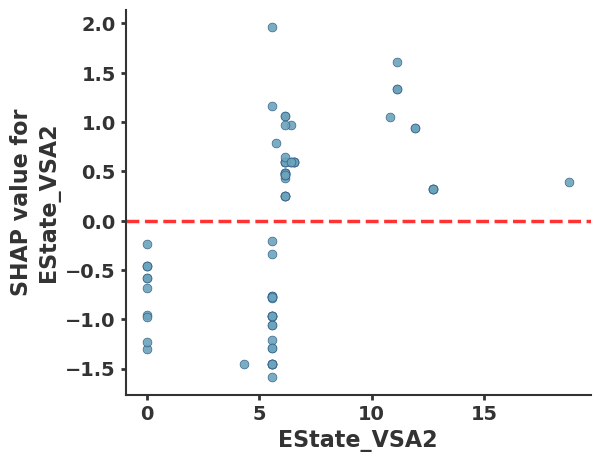

In [63]:
import matplotlib.pyplot as plt

# 使用支持数学符号的字体
plt.rcParams['font.family'] = 'DejaVu Sans'  # 或者 'Arial', 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# 创建更大的图形
plt.figure(figsize=(12, 8))

# 绘制SHAP依赖图
shap.dependence_plot('EState_VSA2', shap_values, X_train, feature_names=feature_names, 
                    interaction_index=None, 
                    show=False)

# 获取当前坐标轴
ax = plt.gca()

# 手动增强数据点的视觉效果
scatter = ax.collections[0]
# 使用淡蓝色并增加点的大小和对比度
scatter.set_color('#6CA4BC')  # 淡蓝色
scatter.set_alpha(0.9)        # 更高的不透明度
scatter.set_sizes([40])       # 增大点的大小
scatter.set_edgecolor('#2E5A87')  # 使用更深的蓝色作为边框
scatter.set_linewidth(0.5)    # 边框宽度

# 添加y=0处的红色虚线（更醒目）
ax.axhline(y=0, color='red', linestyle='--', linewidth=2.5, alpha=0.9)

# 增强坐标轴标签和刻度
ax.set_xlabel(ax.get_xlabel(), fontsize=16, fontweight='bold')
ax.set_ylabel(ax.get_ylabel(), fontsize=16, fontweight='bold')

# 设置坐标轴刻度字体大小和粗细
ax.tick_params(axis='both', which='major', labelsize=14, width=2)
ax.tick_params(axis='both', which='minor', labelsize=12)

# 增强坐标轴线宽
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# 移除网格线（关键修改）
ax.grid(False)

# 如果图形中有其他线条（如平滑曲线），也可以增强它们
lines = ax.get_lines()
if len(lines) > 0:
    for line in lines:
        line.set_linewidth(2.5)
        line.set_alpha(0.8)



plt.show()

<Figure size 1200x800 with 0 Axes>

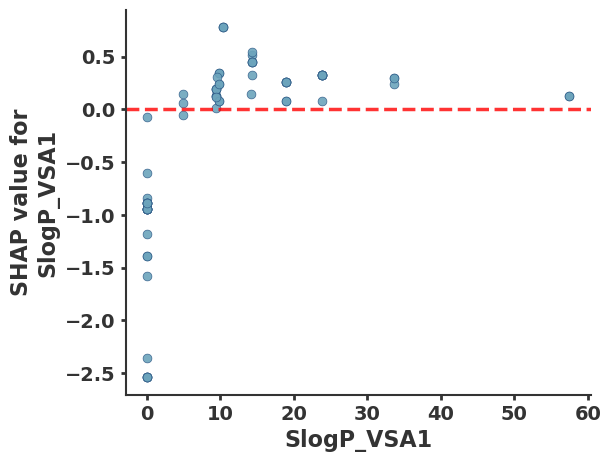

In [64]:
import matplotlib.pyplot as plt

# 使用支持数学符号的字体
plt.rcParams['font.family'] = 'DejaVu Sans'  # 或者 'Arial', 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# 创建更大的图形
plt.figure(figsize=(12, 8))

# 绘制SHAP依赖图
shap.dependence_plot('SlogP_VSA1', shap_values, X_train, feature_names=feature_names, 
                    interaction_index=None, 
                    show=False)

# 获取当前坐标轴
ax = plt.gca()

# 手动增强数据点的视觉效果
scatter = ax.collections[0]
# 使用淡蓝色并增加点的大小和对比度
scatter.set_color('#6CA4BC')  # 淡蓝色
scatter.set_alpha(0.9)        # 更高的不透明度
scatter.set_sizes([40])       # 增大点的大小
scatter.set_edgecolor('#2E5A87')  # 使用更深的蓝色作为边框
scatter.set_linewidth(0.5)    # 边框宽度

# 添加y=0处的红色虚线（更醒目）
ax.axhline(y=0, color='red', linestyle='--', linewidth=2.5, alpha=0.9)

# 增强坐标轴标签和刻度
ax.set_xlabel(ax.get_xlabel(), fontsize=16, fontweight='bold')
ax.set_ylabel(ax.get_ylabel(), fontsize=16, fontweight='bold')

# 设置坐标轴刻度字体大小和粗细
ax.tick_params(axis='both', which='major', labelsize=14, width=2)
ax.tick_params(axis='both', which='minor', labelsize=12)

# 增强坐标轴线宽
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# 移除网格线（关键修改）
ax.grid(False)

# 如果图形中有其他线条（如平滑曲线），也可以增强它们
lines = ax.get_lines()
if len(lines) > 0:
    for line in lines:
        line.set_linewidth(2.5)
        line.set_alpha(0.8)



plt.show()

<Figure size 1200x800 with 0 Axes>

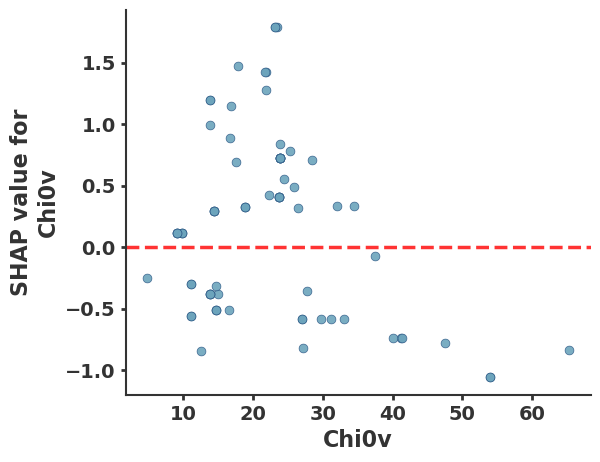

In [65]:
import matplotlib.pyplot as plt

# 使用支持数学符号的字体
plt.rcParams['font.family'] = 'DejaVu Sans'  # 或者 'Arial', 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# 创建更大的图形
plt.figure(figsize=(12, 8))

# 绘制SHAP依赖图
shap.dependence_plot('Chi0v', shap_values, X_train, feature_names=feature_names, 
                    interaction_index=None, 
                    show=False)

# 获取当前坐标轴
ax = plt.gca()

# 手动增强数据点的视觉效果
scatter = ax.collections[0]
# 使用淡蓝色并增加点的大小和对比度
scatter.set_color('#6CA4BC')  # 淡蓝色
scatter.set_alpha(0.9)        # 更高的不透明度
scatter.set_sizes([40])       # 增大点的大小
scatter.set_edgecolor('#2E5A87')  # 使用更深的蓝色作为边框
scatter.set_linewidth(0.5)    # 边框宽度

# 添加y=0处的红色虚线（更醒目）
ax.axhline(y=0, color='red', linestyle='--', linewidth=2.5, alpha=0.9)

# 增强坐标轴标签和刻度
ax.set_xlabel(ax.get_xlabel(), fontsize=16, fontweight='bold')
ax.set_ylabel(ax.get_ylabel(), fontsize=16, fontweight='bold')

# 设置坐标轴刻度字体大小和粗细
ax.tick_params(axis='both', which='major', labelsize=14, width=2)
ax.tick_params(axis='both', which='minor', labelsize=12)

# 增强坐标轴线宽
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# 移除网格线（关键修改）
ax.grid(False)

# 如果图形中有其他线条（如平滑曲线），也可以增强它们
lines = ax.get_lines()
if len(lines) > 0:
    for line in lines:
        line.set_linewidth(2.5)
        line.set_alpha(0.8)


plt.show()

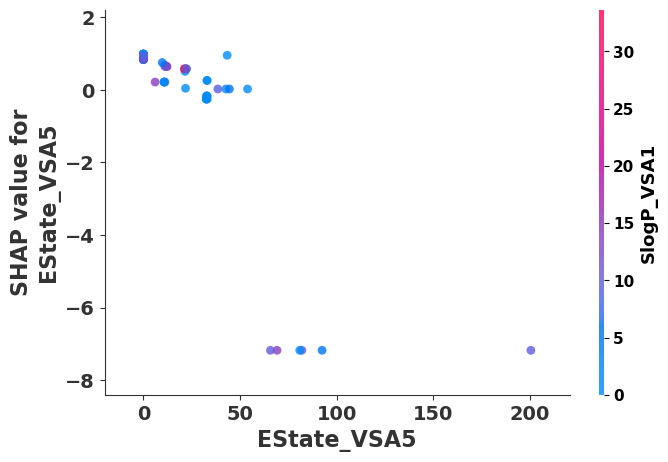

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# 设置全局字体大小
plt.rcParams['font.size'] = 12  # 基础字体大小

# 绘制依赖图
shap.dependence_plot(
    "EState_VSA5", 
    shap_values, 
    X_train, 
    feature_names=feature_names,
    interaction_index="SlogP_VSA1",
    display_features=X,
    show=False,
    alpha=0.8,
    dot_size=40  # 增大点的大小
)

# 获取当前坐标轴
ax = plt.gca()

# 去掉网格线（横竖线）
ax.grid(False)

# 自动计算合适的坐标轴范围（基于数据点的实际分布）
x_data = X["EState_VSA5"]
y_data = shap_values[:, X.columns.get_loc("EState_VSA5")]

# 设置x轴范围（数据范围 + 10%边距）
x_margin = (x_data.max() - x_data.min()) * 0.1
ax.set_xlim(x_data.min() - x_margin, x_data.max() + x_margin)

# 设置y轴范围（数据范围 + 15%边距）
y_margin = (y_data.max() - y_data.min()) * 0.15
ax.set_ylim(y_data.min() - y_margin, y_data.max() + y_margin)

# 设置刻度标签大小
ax.tick_params(axis='both', which='major', labelsize=14)  # 刻度标签大小

# 设置坐标轴标签字体大小
ax.set_xlabel(ax.get_xlabel(), fontsize=16)  # x轴标签
ax.set_ylabel(ax.get_ylabel(), fontsize=16)  # y轴标签

# 如果有标题，也可以设置标题字体大小
# ax.set_title(ax.get_title(), fontsize=18)
plt.savefig(
    'C:/Users/LHF/Desktop/论文图/结果图/30.png',
    dpi=600,
    bbox_inches='tight',
    facecolor='white',
    edgecolor='none'
)

plt.show()

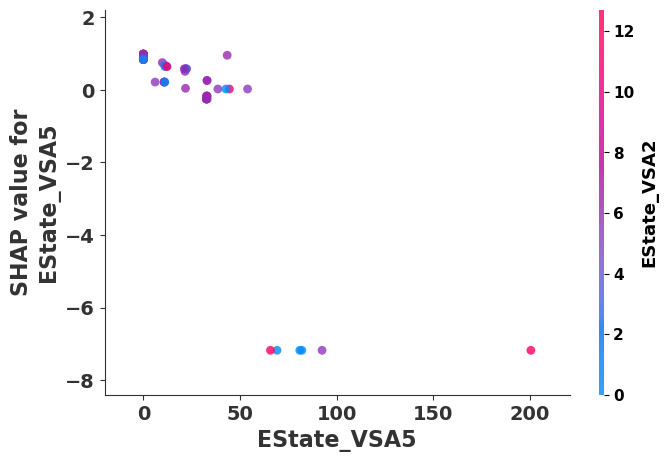

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# 设置全局字体大小
plt.rcParams['font.size'] = 12  # 基础字体大小

# 绘制依赖图
shap.dependence_plot(
    "EState_VSA5", 
    shap_values, 
    X_train, 
    feature_names=feature_names,
    interaction_index="EState_VSA2",
    display_features=X,
    show=False,
    alpha=0.8,
    dot_size=40  # 增大点的大小
)

# 获取当前坐标轴
ax = plt.gca()

# 去掉网格线（横竖线）
ax.grid(False)

# 自动计算合适的坐标轴范围（基于数据点的实际分布）
x_data = X["EState_VSA5"]
y_data = shap_values[:, X.columns.get_loc("EState_VSA5")]

# 设置x轴范围（数据范围 + 10%边距）
x_margin = (x_data.max() - x_data.min()) * 0.1
ax.set_xlim(x_data.min() - x_margin, x_data.max() + x_margin)

# 设置y轴范围（数据范围 + 15%边距）
y_margin = (y_data.max() - y_data.min()) * 0.15
ax.set_ylim(y_data.min() - y_margin, y_data.max() + y_margin)

# 设置刻度标签大小
ax.tick_params(axis='both', which='major', labelsize=14)  # 刻度标签大小

# 设置坐标轴标签字体大小
ax.set_xlabel(ax.get_xlabel(), fontsize=16)  # x轴标签
ax.set_ylabel(ax.get_ylabel(), fontsize=16)  # y轴标签



plt.show()

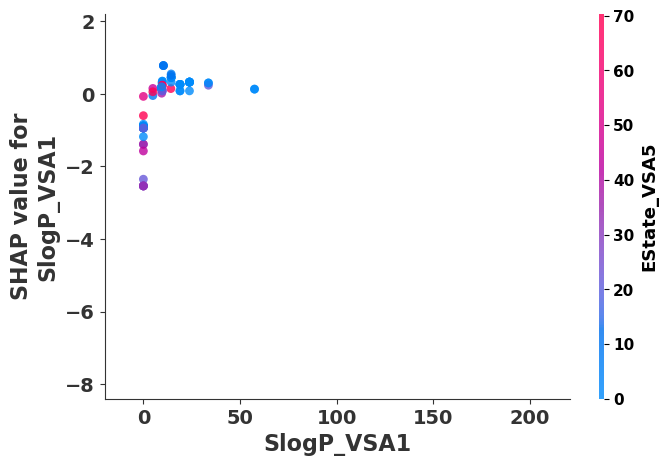

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# 设置全局字体大小
plt.rcParams['font.size'] = 12  # 基础字体大小

# 绘制依赖图
shap.dependence_plot(
    "SlogP_VSA1", 
    shap_values, 
    X_train, 
    feature_names=feature_names,
    interaction_index="EState_VSA5",
    display_features=X,
    show=False,
    alpha=0.8,
    dot_size=40  # 增大点的大小
)

# 获取当前坐标轴
ax = plt.gca()

# 去掉网格线（横竖线）
ax.grid(False)

# 自动计算合适的坐标轴范围（基于数据点的实际分布）
x_data = X["EState_VSA5"]
y_data = shap_values[:, X.columns.get_loc("EState_VSA5")]

# 设置x轴范围（数据范围 + 10%边距）
x_margin = (x_data.max() - x_data.min()) * 0.1
ax.set_xlim(x_data.min() - x_margin, x_data.max() + x_margin)

# 设置y轴范围（数据范围 + 15%边距）
y_margin = (y_data.max() - y_data.min()) * 0.15
ax.set_ylim(y_data.min() - y_margin, y_data.max() + y_margin)

# 设置刻度标签大小
ax.tick_params(axis='both', which='major', labelsize=14)  # 刻度标签大小

# 设置坐标轴标签字体大小
ax.set_xlabel(ax.get_xlabel(), fontsize=16)  # x轴标签
ax.set_ylabel(ax.get_ylabel(), fontsize=16)  # y轴标签



plt.show()

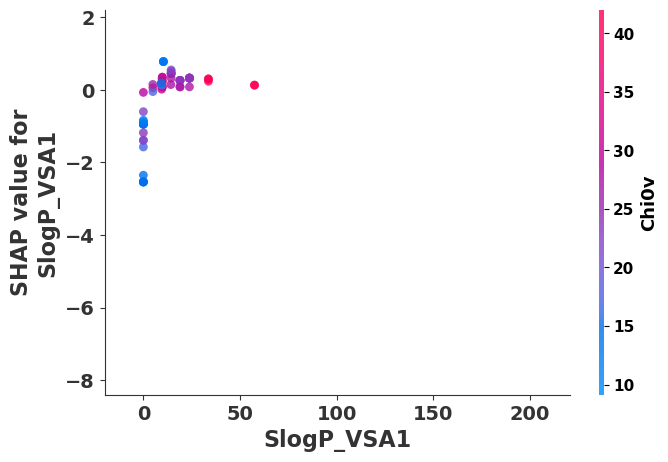

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# 设置全局字体大小
plt.rcParams['font.size'] = 12  # 基础字体大小

# 绘制依赖图
shap.dependence_plot(
    "SlogP_VSA1", 
    shap_values, 
    X_train, 
    feature_names=feature_names,
    interaction_index="Chi0v",
    display_features=X,
    show=False,
    alpha=0.8,
    dot_size=40  # 增大点的大小
)

# 获取当前坐标轴
ax = plt.gca()

# 去掉网格线（横竖线）
ax.grid(False)

# 自动计算合适的坐标轴范围（基于数据点的实际分布）
x_data = X["EState_VSA5"]
y_data = shap_values[:, X.columns.get_loc("EState_VSA5")]

# 设置x轴范围（数据范围 + 10%边距）
x_margin = (x_data.max() - x_data.min()) * 0.1
ax.set_xlim(x_data.min() - x_margin, x_data.max() + x_margin)

# 设置y轴范围（数据范围 + 15%边距）
y_margin = (y_data.max() - y_data.min()) * 0.15
ax.set_ylim(y_data.min() - y_margin, y_data.max() + y_margin)

# 设置刻度标签大小
ax.tick_params(axis='both', which='major', labelsize=14)  # 刻度标签大小

# 设置坐标轴标签字体大小
ax.set_xlabel(ax.get_xlabel(), fontsize=16)  # x轴标签
ax.set_ylabel(ax.get_ylabel(), fontsize=16)  # y轴标签



plt.show()